### Read Data

In [13]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"

FILE_EXTENSIONS = {
    "ts": "ts",
    "cpp": ("cpp", "cc"),
    "java": "java",
    "py": "py",
    "rs": "rs"
}

BASE_PATH = "data"
FIGS_PATH = "figs"
CHECKPOINT_PATH = os.path.join(BASE_PATH, "checkpoint.pkl")

COLS = [
    "lang",
    "repo",
    "filename",
    "name",
    "has_comment",
    "n_comments",
    "comments_len",
    "comments_chars",
    "has_docstring_comment",
    "has_non_docstring_comment",
    "len",
    "mccabe",
    "fanout",
    "chars",
    "identifiers",
    "halstead",
    "entropy",
]

In [2]:
df = pd.read_pickle(CHECKPOINT_PATH)

df["avg_chars"] = df["chars"] / df["len"]
df["avg_identifiers"] = df["identifiers"] / df["len"]


def comment_type(n):
    if n == 0:
        return "NoComments"
    elif n == 1:
        return "OneComment"
    else:
        return "MultiComment"


df['comment_type'] = df['n_comments'].apply(comment_type)
df

,lang,repo,filename,name,has_comment,n_comments,comments_len,comments_chars,has_docstring_comment,has_non_docstring_comment,...,avg_chars,avg_identifiers,comment_type,mccabe_percentile,fanout_percentile,chars_percentile,identifiers_percentile,halstead_percentile,entropy_percentile,len_percentile
0,ts,nest,nest/integration/discovery/src/webhooks.explor...,constructor,False,0,0,0,False,False,...,36.666667,1.333333,NoComments,29.837134,7.198697,16.514658,6.775244,1.856678,1.368078,4.071661
1,ts,nest,nest/integration/discovery/src/webhooks.explor...,getWebhooks,False,0,0,0,False,False,...,24.423077,1.076923,NoComments,29.837134,83.680782,88.013029,80.521173,85.960912,76.938111,91.726384
2,ts,nest,nest/integration/graphql-code-first/src/common...,canActivate,False,0,0,0,False,False,...,22.000000,1.000000,NoComments,72.345277,23.094463,24.820847,16.156352,22.866450,34.788274,34.006515
3,ts,nest,nest/integration/graphql-code-first/src/common...,parseLiteral,True,1,1,39,False,True,...,21.000000,1.750000,OneComment,72.345277,23.094463,8.599349,21.368078,31.661238,46.091205,12.671010
4,ts,nest,nest/integration/graphql-code-first/src/main.ts,bootstrap,False,0,0,0,False,False,...,29.750000,2.250000,NoComments,29.837134,56.286645,19.674267,31.596091,43.648208,29.446254,12.671010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607268,rs,zed,zed/tooling/xtask/src/tasks/licenses.rs,run_licenses,False,0,0,0,False,False,...,40.705882,1.647059,NoComments,88.297161,57.365189,69.581737,55.161408,61.590370,82.321114,62.788011
607269,rs,zed,zed/tooling/xtask/src/tasks/licenses.rs,first_license_file,False,0,0,0,False,False,...,25.375000,1.500000,NoComments,81.731412,39.136118,30.488176,25.141346,32.774029,39.522159,34.917016
607270,rs,zed,zed/tooling/xtask/src/tasks/package_conformity.rs,run_package_conformity,True,2,2,120,False,True,...,34.520833,1.500000,MultiComment,97.875251,80.594565,88.415709,82.539972,85.889720,94.467749,89.370174
607271,rs,zed,zed/tooling/xtask/src/tasks/package_conformity.rs,read_cargo_toml,False,0,0,0,False,False,...,44.200000,2.400000,NoComments,29.855918,39.136118,33.369810,25.141346,35.148033,49.911849,15.317041


### Comment% By Lang/Repo

In [3]:
percent_with_comment_per_repo = (
    df.groupby('repo')['has_comment'].mean().mul(100).sort_values(
        ascending=False))
percent_with_comment_per_lang = (
    df.groupby('lang')['has_comment'].mean().mul(100).sort_values(
        ascending=False))
print("comment%% per repo", percent_with_comment_per_repo)
print("comment%% by lang", percent_with_comment_per_lang)

comment%% per repo repo
TypeScript       54.011525
tesseract        51.680929
ansible          47.626841
imgui            45.614035
scikit-learn     44.368711
transformers     42.356763
vite             41.460542
angular          41.201867
terminal         41.054486
alacritty        39.818418
bitcoin          36.719461
tensorflow       36.086677
rust             32.181979
django           32.042724
uv               31.153725
grpc             30.852573
opencv           29.074602
n8n              27.991089
godot            27.684414
electron         26.173772
vscode           25.349205
x64dbg           25.128839
keras            24.987870
sway             24.931942
react-native     24.860112
spark            23.533569
deno             21.383421
hoppscotch       21.225627
puppeteer        21.163575
localstack       21.126242
elasticsearch    20.637128
beam             20.063488
core             19.926243
hadoop           19.922856
rustdesk         18.767507
kafka            18.282377
dubb

### Overall Metric Averages by Lang/Repo

In [4]:
# Compute the average for each metric for each language and overall
metrics = [
    'len', 'mccabe', 'fanout', 'chars', 'identifiers', 'halstead', 'entropy'
]

# Per-language averages
avg_per_repo = df.groupby(['repo', 'lang'])[metrics].mean()
avg_per_lang = df.groupby('lang')[metrics].mean()

# Overall averages
overall_avg = df[metrics].mean()
print("\nOverall average:")
print(overall_avg)

# Display results
print("Average per language:")
# avg_per_lang.to_csv(
# os.path.join(BASE_VALIDATION_PATH, "metrics-per-language.csv"))
avg_per_lang


Overall average:
len             15.101352
mccabe           2.679461
fanout           7.731237
chars          586.448255
identifiers     36.284571
halstead       249.513906
entropy          4.258391
dtype: float64
Average per language:


,len,mccabe,fanout,chars,identifiers,halstead,entropy
lang,,,,,,,
cpp,17.247291,3.462161,9.808354,699.649850,46.592849,382.137134,4.343558
java,11.648635,2.226094,7.119909,450.800234,25.592125,136.053220,4.138151
py,16.507014,2.906298,5.854199,695.603199,43.362551,181.006592,4.262323
rs,18.632892,2.084949,9.165002,657.506089,41.855754,363.621168,4.359340
ts,15.659968,2.706090,5.453702,547.932358,31.844530,264.470480,4.335242


In [5]:
avg_per_repo = avg_per_repo.sort_values('lang')
# avg_per_repo.to_csv(os.path.join(BASE_VALIDATION_PATH, "metrics-per-repo.csv"))
avg_per_repo

,,len,mccabe,fanout,chars,identifiers,halstead,entropy
repo,lang,,,,,,,
x64dbg,cpp,14.259946,3.260153,8.316223,496.227994,29.394352,256.874955,4.026726
tesseract,cpp,20.750000,4.879584,9.988386,754.697127,50.223105,425.888069,4.560516
opencv,cpp,18.707385,3.714906,8.889429,722.559770,52.445695,443.294208,4.272604
bitcoin,cpp,13.968687,3.207355,7.770435,560.063353,36.507919,299.430775,4.292136
terminal,cpp,15.467200,2.436162,8.989292,591.913798,36.093792,286.176740,4.089751
tensorflow,cpp,18.076805,3.141549,11.720318,804.380196,52.147023,406.575878,4.464093
grpc,cpp,13.806784,2.729653,7.055591,561.224687,33.777634,243.180899,4.312145
godot,cpp,17.623528,4.019298,9.633353,668.794283,45.779015,401.702917,4.329824
imgui,cpp,19.023392,5.165497,7.792398,962.132164,58.419883,573.614603,4.544001


### Metrics by CommentPresence

In [6]:
metric_to_use = 'len'

no_comment = df[~df['has_comment']].groupby('lang').agg(
    {metric_to_use: ['mean', 'count']})

one_comment = df[df['n_comments'] == 1]
more_than_one_comment = df[df['n_comments'] > 1]

one_comment.groupby('lang').agg({metric_to_use: ['mean', 'count']})
more_than_one_comment.groupby('lang').agg({metric_to_use: ['mean', 'count']})

print(no_comment)
print(one_comment)
print(more_than_one_comment)

            len        
           mean   count
lang                   
cpp   10.764239  107800
java   9.480158  182388
py    12.142842   58491
rs    14.118435   57905
ts    11.543799   46017
       lang  repo                                           filename  \
3        ts  nest  nest/integration/graphql-code-first/src/common...   
15       ts  nest  nest/integration/graphql-schema-first/src/comm...   
33       ts  nest  nest/integration/inspector/src/cats/cats.contr...   
63       ts  nest  nest/integration/microservices/src/disconnecte...   
80       ts  nest  nest/integration/microservices/src/grpc-advanc...   
...     ...   ...                                                ...   
607198   rs   zed                        zed/crates/zeta/src/zeta.rs   
607203   rs   zed                  zed/crates/zlog/src/env_config.rs   
607220   rs   zed                        zed/crates/zlog/src/sink.rs   
607221   rs   zed                        zed/crates/zlog/src/sink.rs   
607267   rs   ze

### Standard Deviation/Error For Each Metric (Small/All Methods)

In [7]:
metrics = [
    "chars", "avg_chars", "identifiers", "avg_identifiers", "mccabe", "fanout",
    "halstead", "entropy"
]

std_errs = dict()
for lang in FILE_EXTENSIONS:
    print("*" * 20)
    print(lang)
    df_t = df[df['lang'] == lang]
    small_df = df_t[df_t['len'] <= 15]
    for stat in metrics:
        std_tot = np.std(df_t[stat])
        std_small = np.std(small_df[stat])
        print("=" * 10)
        print(stat)
        print("ovr mean\t", np.mean(df_t[stat]))
        print("std tot\t\t", std_tot)
        print("std err tot\t", std_tot / (len(df_t[stat])**0.5))
        print("std err 16\t", std_tot / (16**0.5))
        print("small mean\t", np.mean(small_df[stat]))
        print("std small\t", std_small)
        print("std err sm\t", std_small / (len(small_df[stat])**0.5))
        print("std err 16\t", std_small / (16**0.5))
        std_errs[(lang, stat)] = (np.mean(df_t[stat]), std_tot)


********************
ts
chars
ovr mean	 547.9323584862279
std tot		 803.267481960947
std err tot	 3.1448496075667176
std err 16	 200.81687049023674
small mean	 249.39863539065288
std small	 164.09544587972593
std err sm	 0.7748631149535341
std err 16	 41.02386146993148
avg_chars
ovr mean	 33.685422070379815
std tot		 14.589363885597383
std err tot	 0.05711840242588038
std err 16	 3.6473409713993457
small mean	 32.850889151281585
std small	 14.987354146470377
std err sm	 0.07077068992735898
std err 16	 3.7468385366175943
identifiers
ovr mean	 31.844530280038626
std tot		 43.004275004394785
std err tot	 0.1683648104876693
std err 16	 10.751068751098696
small mean	 14.956921155904388
std small	 10.10088997660632
std err sm	 0.04769667451230046
std err 16	 2.52522249415158
avg_identifiers
ovr mean	 2.0104856270819234
std tot		 0.9329826429928686
std err tot	 0.0036526937347444257
std err 16	 0.23324566074821715
small mean	 1.9843465494771015
std small	 0.9952266940446433
std err sm	 0.0046

### Correlation And Standard Error

In [8]:
PAIRS_OF_METRICS = [("chars", "identifiers"), ("chars", "len"),
                    ("len", "identifiers"), ("len", "halstead"),
                    ("len", "mccabe"), ("len", "fanout"), ("len", "entropy")]


def calculate_correlations():
    correlations = dict()
    correlations['overall'] = dict()
    for x, y in PAIRS_OF_METRICS:
        corr = df[x].corr(df[y], method='pearson')
        n = len(df[x])
        std_err = ((1 - corr**2)**0.5) / ((n - 2)**0.5)
        correlations['overall'][(x, y)] = corr
        # correlations['overall_std_err'][(x, y)] = std_err
        correlations['overall'][(x, y, "std_err")] = std_err

    # Per-language correlations
    for lang in df['lang'].unique():
        correlations[lang] = {}
        df_lang = df[df['lang'] == lang]
        for x, y in PAIRS_OF_METRICS:
            corr = df_lang[x].corr(df_lang[y], method='pearson')
            n = len(df_lang[x])
            std_err = ((1 - corr**2)**0.5) / ((n - 2)**0.5)
            correlations[lang][(x, y)] = corr
            correlations[lang][(x, y, "std_err")] = corr
    return correlations


calculate_correlations()

{'overall': {('chars', 'identifiers'): np.float64(0.9247273445023496),
  ('chars', 'identifiers', 'std_err'): np.float64(0.0004897681170050935),
  ('chars', 'len'): np.float64(0.9112770519935174),
  ('chars', 'len', 'std_err'): np.float64(0.0005298672623031986),
  ('len', 'identifiers'): np.float64(0.8646007813495717),
  ('len', 'identifiers', 'std_err'): np.float64(0.0006465294215049432),
  ('len', 'halstead'): np.float64(0.8299636383269262),
  ('len', 'halstead', 'std_err'): np.float64(0.0007177602695351594),
  ('len', 'mccabe'): np.float64(0.7097614492321064),
  ('len', 'mccabe', 'std_err'): np.float64(0.000906426495421624),
  ('len', 'fanout'): np.float64(0.7165031838045937),
  ('len', 'fanout', 'std_err'): np.float64(0.0008976017334470435),
  ('len', 'entropy'): np.float64(0.584949042486121),
  ('len', 'entropy', 'std_err'): np.float64(0.0010436278137537242)},
 'ts': {('chars', 'identifiers'): np.float64(0.9678678811312991),
  ('chars', 'identifiers', 'std_err'): np.float64(0.9678

### ANOVA + Cliff's Delta (NC/SC/MC)

In [9]:
from scipy import stats

metrics = ["chars", "identifiers", "mccabe", "fanout", "halstead", "entropy"]


def cliffs_delta(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    n = len(a)
    m = len(b)
    if n == 0 or m == 0:
        return np.nan
    gt = np.sum(a[:, None] > b)
    lt = np.sum(a[:, None] < b)
    return (gt - lt) / (n * m)


res = []
for lang in FILE_EXTENSIONS:
    df_l = df[df['lang'] == lang]
    group_a = df_l[df_l['comment_type'] == 'NoComments']
    group_b = df_l[df_l['comment_type'] == 'OneComment']
    group_c = df_l[df_l['comment_type'] == 'MultiComment']

    for metric in metrics:
        f_statistic, p_value = stats.f_oneway(group_a[metric], group_b[metric],
                                              group_c[metric])

        effect_nc_sc = -cliffs_delta(group_a[metric], group_b[metric])
        effect_sc_mc = -cliffs_delta(group_b[metric], group_c[metric])
        res.append(
            (lang, metric, f_statistic, p_value, effect_nc_sc, effect_sc_mc))
        print("lang", lang, "metric", metric)
        print(f'F-statistic: {f_statistic:.2f}')
        print(f'P-value: {p_value:.4f}')
        print(f'Effect size (NC/SC): {effect_nc_sc:.4f}')
        print(f'Effect size (SC/MC): {effect_sc_mc:.4f}')
res

lang ts metric chars
F-statistic: 5828.98
P-value: 0.0000
Effect size (NC/SC): 0.3016
Effect size (SC/MC): 0.4625
lang ts metric identifiers
F-statistic: 6692.60
P-value: 0.0000
Effect size (NC/SC): 0.3080
Effect size (SC/MC): 0.4478
lang ts metric mccabe
F-statistic: 7252.05
P-value: 0.0000
Effect size (NC/SC): 0.2693
Effect size (SC/MC): 0.4454
lang ts metric fanout
F-statistic: 4669.34
P-value: 0.0000
Effect size (NC/SC): 0.2426
Effect size (SC/MC): 0.4058
lang ts metric halstead
F-statistic: 5507.94
P-value: 0.0000
Effect size (NC/SC): 0.3072
Effect size (SC/MC): 0.4661
lang ts metric entropy
F-statistic: 6015.14
P-value: 0.0000
Effect size (NC/SC): 0.3367
Effect size (SC/MC): 0.4521
lang cpp metric chars
F-statistic: 26316.68
P-value: 0.0000
Effect size (NC/SC): 0.3863
Effect size (SC/MC): 0.5163
lang cpp metric identifiers
F-statistic: 23801.71
P-value: 0.0000
Effect size (NC/SC): 0.3656
Effect size (SC/MC): 0.4995
lang cpp metric mccabe
F-statistic: 15246.01
P-value: 0.0000
Effe

[('ts',
  'chars',
  np.float64(5828.978447990983),
  np.float64(0.0),
  np.float64(0.30161488615398707),
  np.float64(0.46251994359331766)),
 ('ts',
  'identifiers',
  np.float64(6692.603519051363),
  np.float64(0.0),
  np.float64(0.30801213617017575),
  np.float64(0.4478030460613005)),
 ('ts',
  'mccabe',
  np.float64(7252.054329672442),
  np.float64(0.0),
  np.float64(0.26926543519871154),
  np.float64(0.44543216805478003)),
 ('ts',
  'fanout',
  np.float64(4669.3409665040035),
  np.float64(0.0),
  np.float64(0.24261141935825706),
  np.float64(0.4058039320487223)),
 ('ts',
  'halstead',
  np.float64(5507.943541211185),
  np.float64(0.0),
  np.float64(0.3072150032570148),
  np.float64(0.4661361162800687)),
 ('ts',
  'entropy',
  np.float64(6015.143098889553),
  np.float64(0.0),
  np.float64(0.33670240080031855),
  np.float64(0.452068338112406)),
 ('cpp',
  'chars',
  np.float64(26316.683705649073),
  np.float64(0.0),
  np.float64(0.38632973168142354),
  np.float64(0.5162982184578969)

/var/folders/xr/wn65jnkd4bq8tlxrq437hk3r0000gn/T/ipykernel_34578/3631219974.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


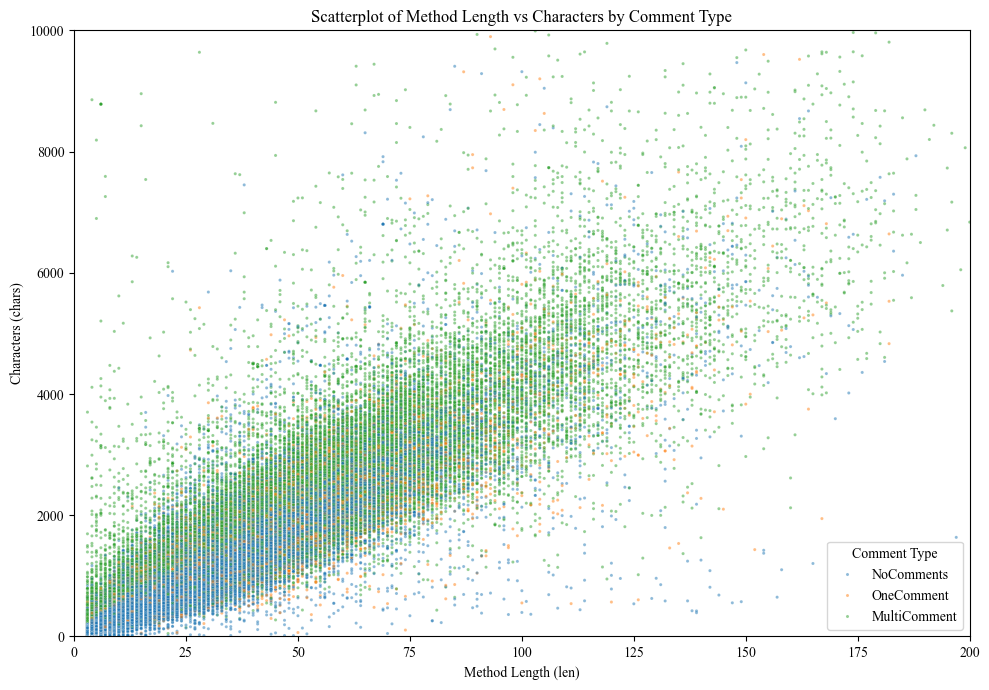

In [10]:
def plot_scatter():
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df,
                    x='len',
                    y='chars',
                    hue='comment_type',
                    palette='tab10',
                    alpha=0.5,
                    s=5)
    plt.ylim(0, 10000)
    plt.xlim(0, 200)
    plt.xlabel("Method Length (len)")
    plt.ylabel("Characters (chars)")
    plt.title("Scatterplot of Method Length vs Characters by Comment Type")
    plt.legend(title="Comment Type")
    plt.tight_layout()
    plt.show()


plot_scatter()

## Plots and Stats by CommentPresence

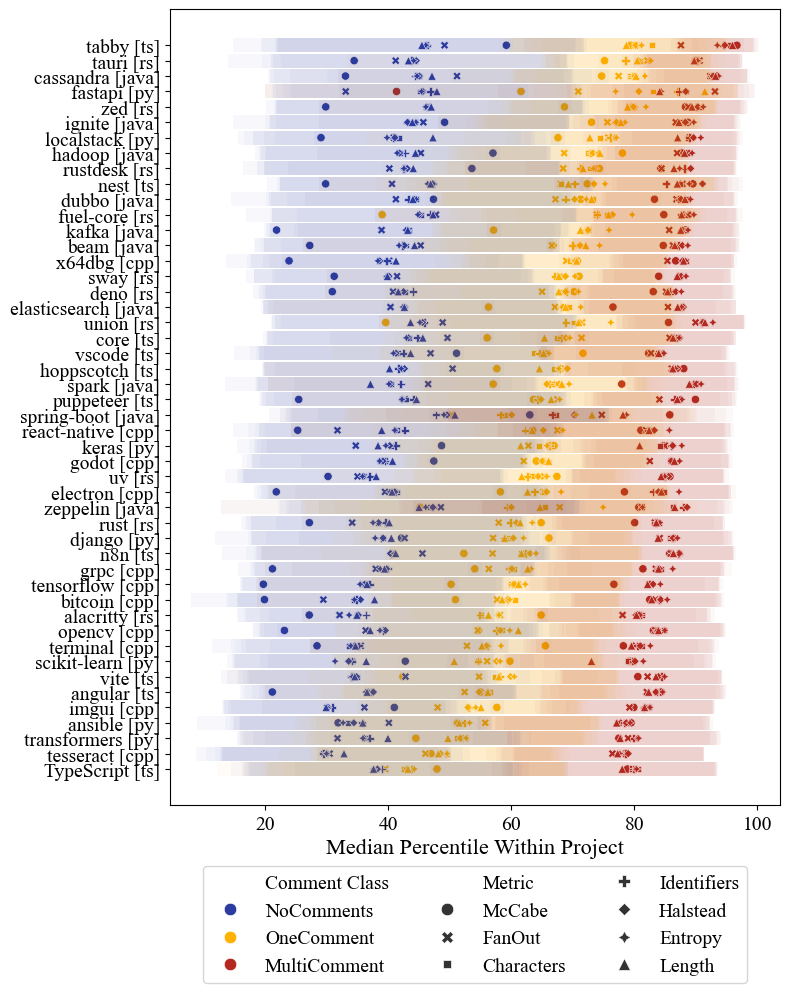

,repo,Metric,Comment Class,median_percentile,75_percentile,25_percentile,lang,color
60,vscode [ts],McCabe,NoComments,51.107268,51.107268,18.753854,ts,#2c3ba0
61,vscode [ts],McCabe,OneComment,71.653396,82.317220,51.107268,ts,#ffb300
62,vscode [ts],McCabe,MultiComment,82.317220,94.412719,71.653396,ts,#b4291f
204,vscode [ts],FanOut,NoComments,46.884635,65.798011,16.062093,ts,#2c3ba0
205,vscode [ts],FanOut,OneComment,65.798011,82.711333,31.931151,ts,#ffb300
206,vscode [ts],FanOut,MultiComment,82.711333,93.017239,65.798011,ts,#b4291f
348,vscode [ts],Characters,NoComments,41.605673,65.342234,20.208317,ts,#2c3ba0
349,vscode [ts],Characters,OneComment,63.604922,82.340009,39.750395,ts,#ffb300
350,vscode [ts],Characters,MultiComment,83.842730,93.574560,65.985348,ts,#b4291f
492,vscode [ts],Identifiers,NoComments,42.456902,65.799351,20.387946,ts,#2c3ba0


In [ ]:
metrics = [
    'mccabe',
    'fanout',
    'chars',
    'identifiers',
    'halstead',
    'entropy',
    'len',
]

METRICS_TO_DISPLAY = {
    "mccabe": "McCabe",
    "fanout": "FanOut",
    "chars": "Characters",
    "identifiers": "Identifiers",
    "halstead": "Halstead",
    "entropy": "Entropy",
    "len": "Length"
}


def generate_percentile_graph(wings):
    dots = []
    colorscheme = {
        "NoComments": "#2c3ba0",
        "MultiComment": "#b4291f",
        "OneComment": "#ffb300",
    }
    # repos = repos.loc[repo_order]
    for metric in metrics:
        # Compute percentile rank for each value within its repo
        df[f'{metric}_percentile'] = df.groupby('repo')[metric].rank(
            pct=True) * 100
        # print(df[f'{metric}_percentile'])

    repos_list = df['repo'].unique()
    ordering = []
    for repo in repos_list:
        repo_df = df[(df['n_comments'] == 1) & (df['repo'] == repo)]
        vals = []
        for metric in metrics:
            val = np.median(repo_df[f'{metric}_percentile'])
            vals.append(val)
        avg_percentile = sum(vals) / len(vals)
        ordering.append((repo, avg_percentile))
    ordering.sort(key=lambda x: x[1], reverse=True)

    for metric in metrics:
        for repo, _ in ordering:
            repo_df = df[df['repo'] == repo]
            lang = repo_df['lang'].iloc[0] if not repo_df.empty else None
            for label, mask in [
                ("NoComments", repo_df['n_comments'] == 0),
                ("OneComment", repo_df['n_comments'] == 1),
                ("MultiComment", repo_df['n_comments'] > 1),
            ]:
                vals = repo_df.loc[mask, f'{metric}_percentile']
                if len(vals) > 0:
                    dots.append({
                        "repo": f"{repo} [{lang}]",
                        "Metric": METRICS_TO_DISPLAY[metric],
                        "Comment Class": label,
                        "median_percentile": np.median(vals),
                        "75_percentile": np.percentile(vals, 75),
                        "25_percentile": np.percentile(vals, 25),
                        "lang": lang,
                        "color": colorscheme[label],
                    })

    # now plot it
    dots_df = pd.DataFrame(dots)
    plt.figure(figsize=(8, 10))
    ax = sns.scatterplot(
        data=dots_df,
        x='median_percentile',
        y='repo',
        style='Metric',  # dot style
        hue='Comment Class',  # color
        # s=60,
        alpha=1,
        palette=colorscheme)
    ax.tick_params(axis='both', labelsize=14)
    if wings:
        # Add wings for each dot using 25_percentile and 75_percentile
        for _, row in dots_df.iterrows():
            ax.plot([row['25_percentile'], row['75_percentile']],
                    [row['repo'], row['repo']],
                    color=row['color'],
                    linewidth=10,
                    alpha=0.03)

    plt.xlabel("Median Percentile Within Project", fontsize=16)
    plt.ylabel(None)
    plt.legend(title=None,
               bbox_to_anchor=(0.5, -.15),
               ncol=3,
               loc='center',
               fontsize=14,
               markerscale=1.5)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_PATH, "percentile-metrics-comments.pdf"),
                bbox_inches='tight')
    plt.savefig(os.path.join(FIGS_PATH, "percentile-metrics-comments.png"),
                bbox_inches='tight')
    plt.show()
    return dots_df


dots_comment_df = generate_percentile_graph(wings=True)
dots_comment_df[dots_comment_df['repo'] == 'vscode [ts]']

### BoxPlot

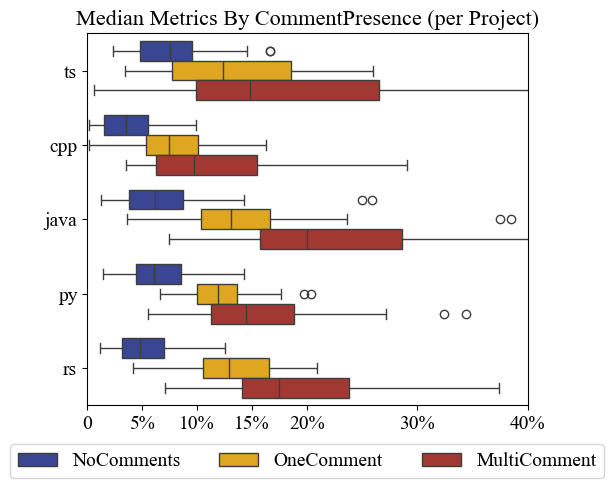

,lang,repo,Metric,Comment Class,median,color
4,ts,nest,Halstead,NoComments,0.077711,#2c3ba0
10,ts,nest,Halstead,OneComment,0.174100,#ffb300
16,ts,nest,Halstead,MultiComment,0.403787,#b4291f
22,ts,n8n,Halstead,NoComments,0.023924,#2c3ba0
28,ts,n8n,Halstead,OneComment,0.039268,#ffb300
...,...,...,...,...,...,...
856,rs,alacritty,Halstead,OneComment,0.107687,#ffb300
862,rs,alacritty,Halstead,MultiComment,0.135717,#b4291f
868,rs,zed,Halstead,NoComments,0.019485,#2c3ba0
874,rs,zed,Halstead,OneComment,0.119714,#ffb300


In [15]:
metrics = [
    'mccabe',
    'fanout',
    'chars',
    'identifiers',
    'halstead',
    # 'entropy', # entropy is hard to normalize in the same plot bounds so it is omittted
    'len',
]


def generate_percentile_graph(wings):
    dots = []
    colorscheme = {
        "NoComments": "#2c3ba0",
        "MultiComment": "#b4291f",
        "OneComment": "#ffb300",
    }

    for lang in FILE_EXTENSIONS:
        lang_df = df[df['lang'] == lang]
        for repo in lang_df['repo'].unique():
            repo_df = lang_df[lang_df['repo'] == repo]
            for label, mask in [
                ("NoComments", repo_df['n_comments'] == 0),
                ("OneComment", repo_df['n_comments'] == 1),
                ("MultiComment", repo_df['n_comments'] > 1),
            ]:
                for metric in metrics:
                    vals = repo_df[mask][metric]
                    med = np.median(vals)
                    dots.append({
                        "lang": lang,
                        "repo": repo,
                        "Metric": METRICS_TO_DISPLAY[metric],
                        "Comment Class": label,
                        "median": (med) / max(vals),
                        "color": colorscheme[label],
                    })

    dots_df = pd.DataFrame(dots)
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(
        data=dots_df,
        x='median',
        y='lang',
        hue='Comment Class',  # color
        palette=colorscheme)
    ax.tick_params(axis='both', labelsize=14)

    # plt.xlabel("Median Metrics By CommentPresence (per Project)", fontsize=16)
    plt.title("Median Metrics By CommentPresence (per Project)",
              fontsize=16,
              loc='center')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.xlim(0, 0.4)
    plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
               ["0", "5%", "10%", "15%", "20%", "30%", "40%"])
    plt.legend(title=None,
               bbox_to_anchor=(0.5, -0.15),
               ncol=3,
               loc='center',
               fontsize=14,
               markerscale=1.5)
    plt.tight_layout()
    plt.savefig(os.path.join(FIGS_PATH, "boxplot-comments.pdf"),
                bbox_inches='tight')
    plt.savefig(os.path.join(FIGS_PATH, "boxplot-comments.png"),
                bbox_inches='tight')
    plt.show()
    return dots_df


dots_comment_boxplot_df = generate_percentile_graph(wings=True)
dots_comment_boxplot_df[dots_comment_boxplot_df["Metric"] == "Halstead"]

### Cliff's Delta By Fixed LOC

In [17]:
from tqdm import tqdm
from scipy.stats import mannwhitneyu


def cliffs_delta(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    n = len(a)
    m = len(b)
    if n == 0 or m == 0:
        return np.nan
    gt = np.sum(a[:, None] > b)
    lt = np.sum(a[:, None] < b)
    return (gt - lt) / (n * m)


lens = np.arange(3, 61)
metrics = ['mccabe', 'fanout', 'chars', 'identifiers', 'halstead', 'entropy']
langs = ['ts', 'cpp', 'java', 'py', 'rs']

cliffs_delta_results = []

attr = "has_comment"  # if INCLUDE_DOCSTRINGS else "has_non_docstring_comment"

for l in tqdm(lens, desc="Computing Cliff's delta"):
    df_l = df[df['len'] == l]
    group_true = df_l[df_l[attr] == True]
    group_false = df_l[df_l[attr] == False]
    for metric in metrics:
        delta_overall = cliffs_delta(group_true[metric], group_false[metric])
        lang_deltas = {}
        for lang in langs:
            a = group_true[group_true["lang"] == lang][metric]
            b = group_false[group_false["lang"] == lang][metric]
            lang_deltas[lang] = cliffs_delta(a, b)
        cliffs_delta_results.append({
            'len': l,
            'metric': metric,
            "overall": delta_overall,
            **lang_deltas,
        })

cliffs_delta_df = pd.DataFrame(cliffs_delta_results)
cliffs_delta_df

Computing Cliff's delta: 100%|██████████| 58/58 [00:27<00:00,  2.13it/s]


,len,metric,overall,ts,cpp,java,py,rs
0,3,mccabe,0.102369,0.072516,0.086405,0.027446,0.155993,0.098447
1,3,fanout,0.198646,0.150576,0.115808,0.205015,0.220104,0.218692
2,3,chars,0.349287,0.308939,0.264537,0.281536,0.247105,0.416337
3,3,identifiers,0.317429,0.294806,0.162731,0.271839,0.247602,0.320595
4,3,halstead,0.330405,0.275531,0.092413,0.311851,0.261983,0.315653
...,...,...,...,...,...,...,...,...
343,60,fanout,0.026887,-0.133197,0.032663,0.055298,0.116014,0.188081
344,60,chars,0.142890,0.024590,0.146300,0.138666,0.071303,0.318259
345,60,identifiers,0.225166,-0.047131,0.255025,0.208105,0.345412,0.245773
346,60,halstead,0.164488,-0.080601,0.236980,0.313846,0.234658,0.257819


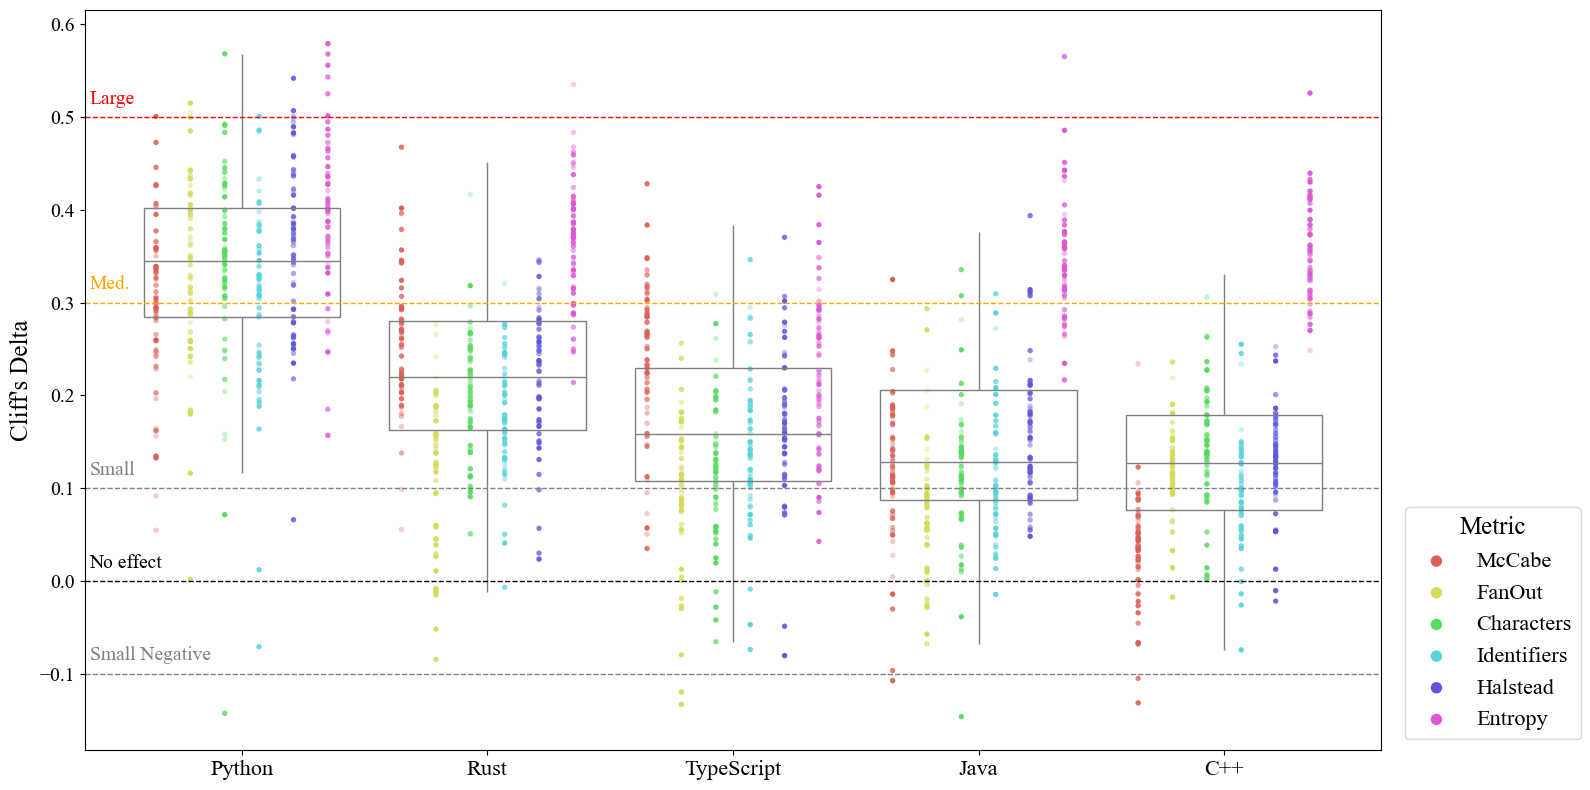

In [18]:
metrics = ['mccabe', 'fanout', 'chars', 'identifiers', 'halstead', 'entropy']
langs = list(reversed(['cpp', 'java', 'ts', 'rs', 'py']))

# Prepare data for plotting: one boxplot per language, swarm per metric
plot_df = cliffs_delta_df.melt(id_vars=['len', 'metric'],
                               value_vars=langs,
                               var_name='lang',
                               value_name='delta')

# Normalize len for alpha (darkness)
len_min = plot_df['len'].min()
len_max = plot_df['len'].max()
plot_df['alpha'] = (plot_df['len'] -
                    len_min) / (len_max - len_min) * 0.7 + 0.3  # [0.3, 1.0]

LANG_TO_LABEL = {
    "py": "Python",
    "rs": "Rust",
    "ts": "TypeScript",
    "java": "Java",
    "cpp": "C++"
}

METRICS = ['mccabe', 'fanout', 'chars', 'identifiers', 'halstead', 'entropy']

METRICS_TO_DISPLAY = {
    "mccabe": "McCabe",
    "fanout": "FanOut",
    "chars": "Characters",
    "identifiers": "Identifiers",
    "halstead": "Halstead",
    "entropy": "Entropy"
}

palette = dict(zip(METRICS, sns.color_palette("hls", n_colors=len(METRICS))))

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=plot_df,
    x='lang',
    y='delta',
    color='lightgray',
    showcaps=False,
    boxprops={'facecolor': 'None'},
    showfliers=False,
)
plt.xticks(ticks=range(len(langs)),
           labels=[LANG_TO_LABEL[lang] for lang in langs],
           fontsize=16)

# Overlay swarmplot: each metric is a color, each dot is a (len, metric, lang)
for i, metric in enumerate(METRICS):
    metric_data = plot_df[plot_df['metric'] == metric]
    # Add a small x-offset for each metric to avoid overlap
    for j, lang in enumerate(langs):
        lang_data = metric_data[metric_data['lang'] == lang]
        x_offset = -.35 + .14 * i
        plt.scatter(
            [j + x_offset] * len(lang_data),
            lang_data['delta'],
            color=palette[metric],
            alpha=lang_data['alpha'],
            edgecolor='none',
            s=15,
        )
        # Add a single dot for the legend with alpha=1
        if j == 0:
            plt.scatter(
                [j + x_offset],
                [None],
                color=palette[metric],
                alpha=1.0,
                label=METRICS_TO_DISPLAY[metric],
                edgecolor='none',
                s=30,
            )

# Add horizontal lines for effect size thresholds
for y, label, color in [
    (-0.1, "Small Negative", "gray"),
    (0, "No effect", "black"),
    (0.1, "Small", "gray"),
    (0.3, "Med.", "orange"),
    (0.5, "Large", "red"),
]:
    plt.axhline(y, linestyle="--", color=color, linewidth=1)
    plt.text(-.62,
             y + 0.01,
             label,
             color=color,
             va="bottom",
             ha="left",
             fontsize=14)
# plt.title(
# "Cliff's Delta per Language\n(swarm: opacity by Length, color by metric)", fontsize=16)
plt.ylabel("Cliff's Delta", fontsize=18)
plt.xlabel(None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(title='Metric',
           title_fontsize=18,
           bbox_to_anchor=(1.01, 0),
           loc='lower left',
           markerscale=1.5,
           fontsize=16)
plt.tight_layout()
# plt.savefig(os.path.join(FIGS_PATH,
#                          f"cliffs_boxplot_swarm.pdf"),
#             bbox_inches="tight")
plt.show()
# plt.clf()


### CommentPresence vs N_comments

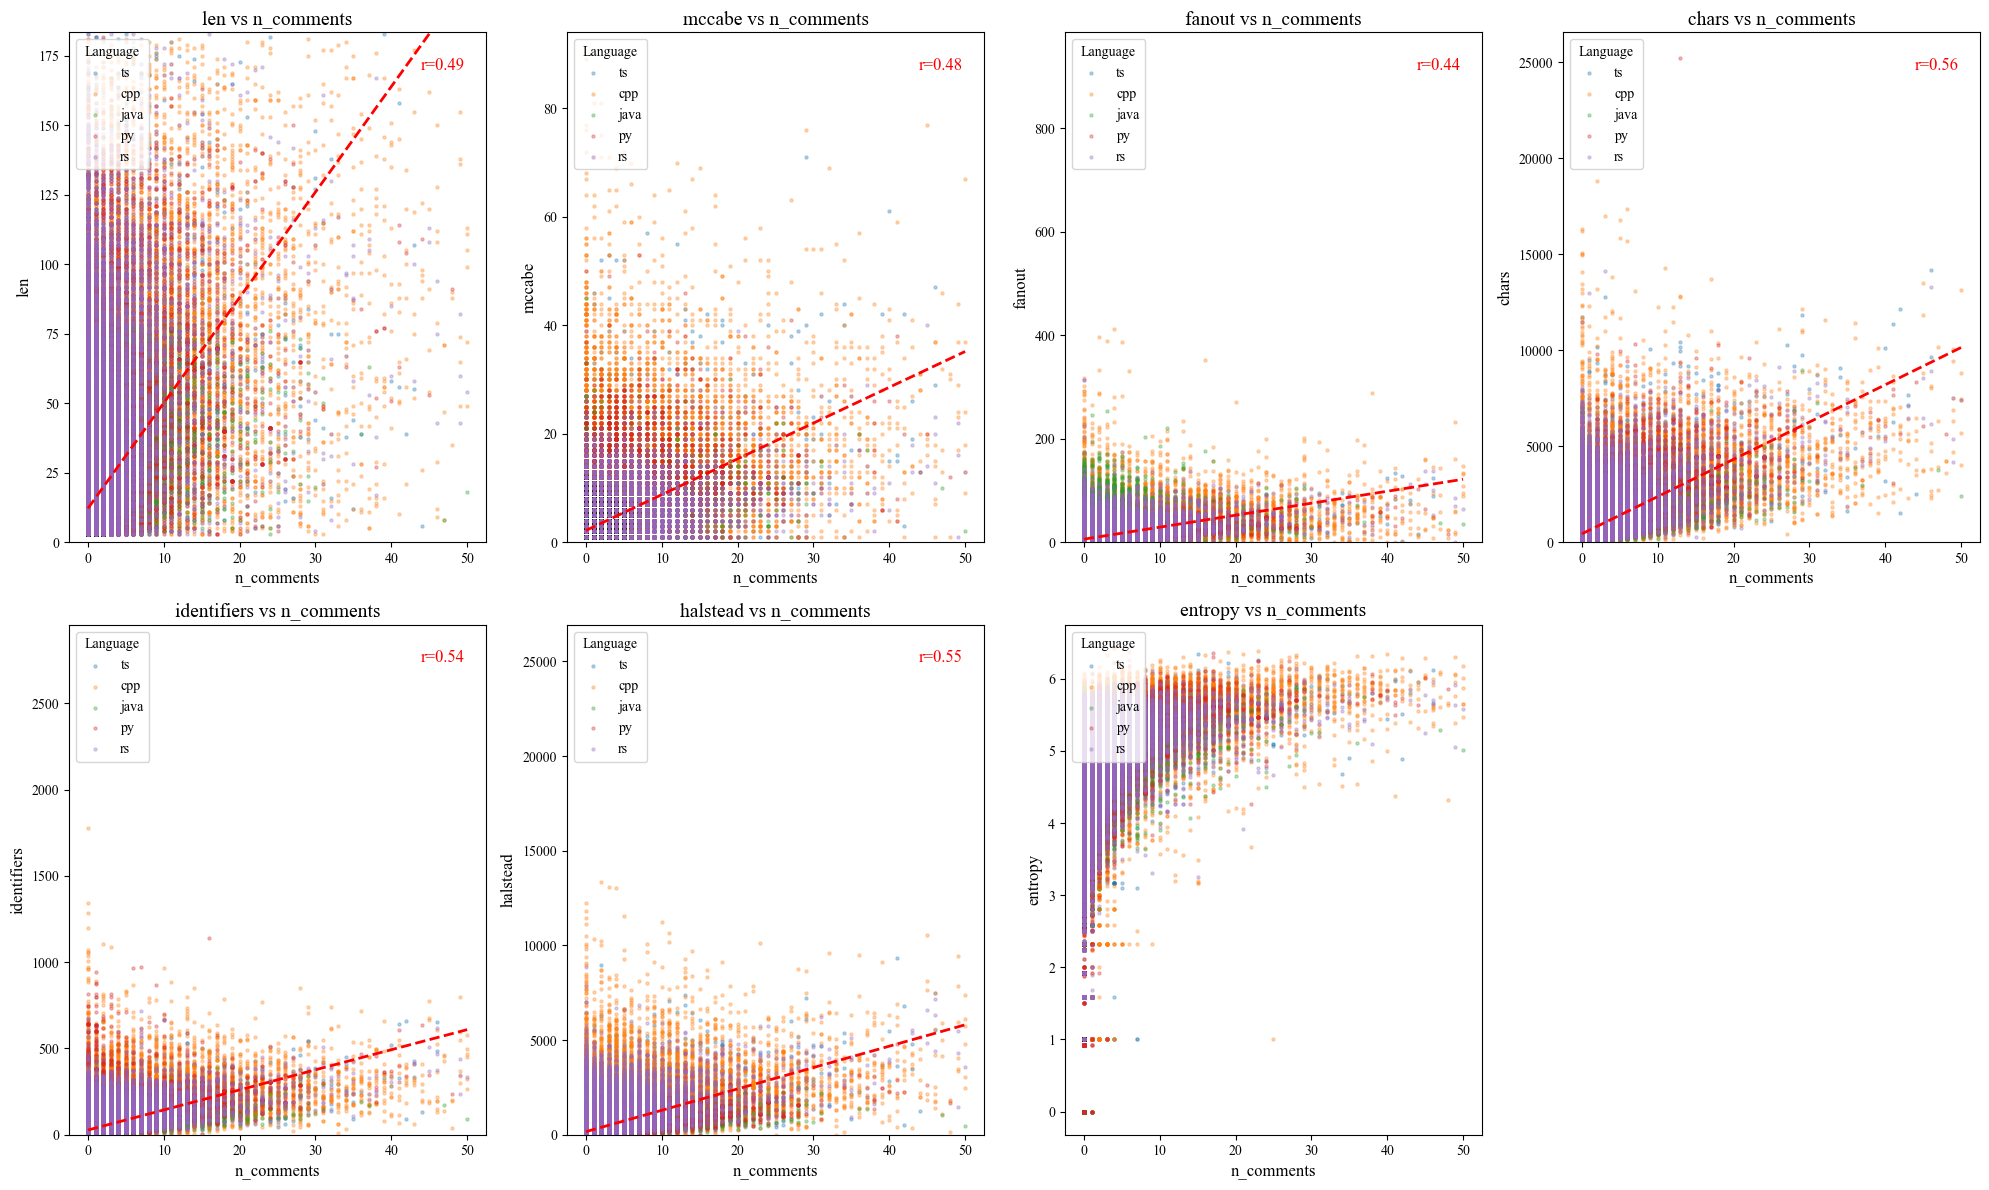

In [ ]:
def plot_n_comments():
    metrics = [
        'len', 'mccabe', 'fanout', 'chars', 'identifiers', 'halstead',
        'entropy'
    ]
    max_n_comments = 50

    plt.figure(figsize=(20, 12))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 4, i)
        subset = df[df['n_comments'] <= max_n_comments]
        # Plot each language in a different color
        for lang in subset['lang'].unique():
            lang_subset = subset[subset['lang'] == lang]
            plt.scatter(
                lang_subset['n_comments'],
                lang_subset[metric],
                alpha=0.3,
                s=5,
                label=lang,
            )
        plt.legend(title='Language', fontsize=10, loc="upper left")
        if metric != 'entropy':
            # Truncate y-axis at half the max value
            ymax = subset[metric].max() / 2
            plt.ylim(0, ymax)
            # Fit line
            x = subset['n_comments']
            y = subset[metric]
            # Only fit if there are enough points
            if len(x) > 1:
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                xs = np.linspace(x.min(), x.max(), 100)
                plt.plot(xs, p(xs), color='red', linestyle='--', linewidth=2)
                # Report correlation
                corr = np.corrcoef(x, y)[0, 1]
                plt.text(0.95,
                         0.95,
                         f"r={corr:.2f}",
                         transform=plt.gca().transAxes,
                         ha='right',
                         va='top',
                         fontsize=12,
                         color='red')
        plt.xlabel('n_comments', fontsize=12)
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs n_comments', fontsize=14)
        plt.tight_layout()

    plt.savefig(os.path.join(FIGS_PATH, "scatter_n_comments_metrics.png"))
    plt.show()


plot_n_comments()

## Small/Medium/Large Method Analysis

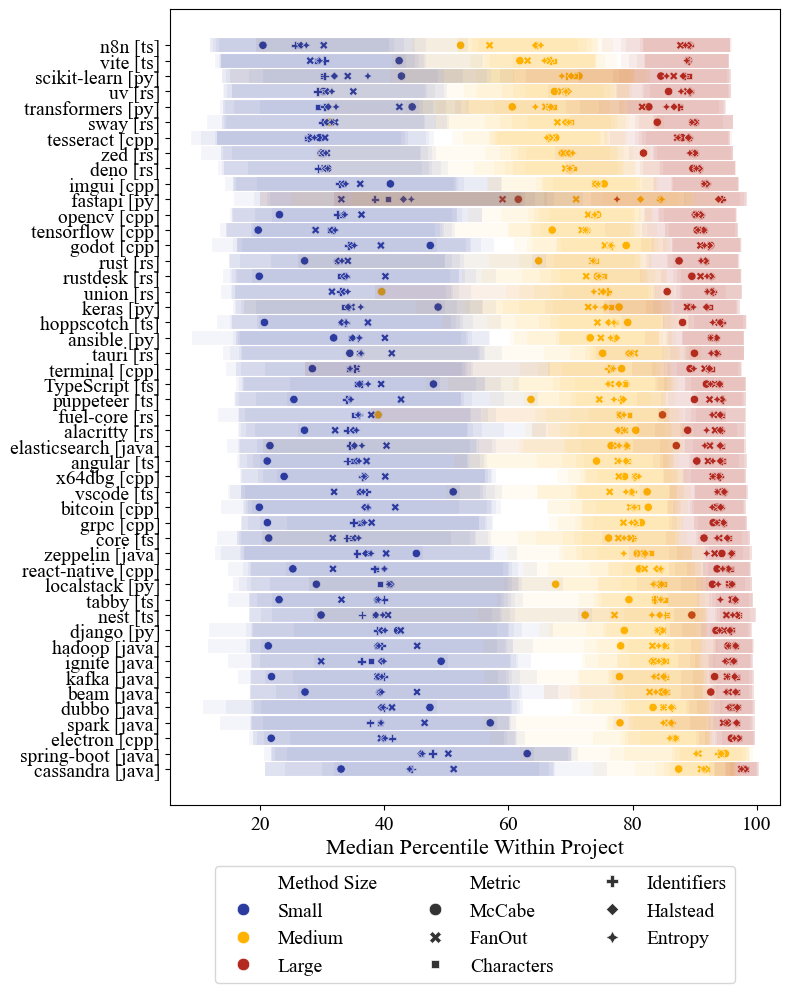

,repo,Metric,Method Size,median_percentile,75_percentile,25_percentile,lang,color
36,tensorflow [cpp],McCabe,Small,19.721394,50.216127,19.721394,cpp,#2c3ba0
37,tensorflow [cpp],McCabe,Medium,67.043867,82.838159,50.216127,cpp,#ffb300
38,tensorflow [cpp],McCabe,Large,90.373363,95.379214,76.676167,cpp,#b4291f
179,tensorflow [cpp],FanOut,Small,28.957303,48.518253,20.080033,cpp,#2c3ba0
180,tensorflow [cpp],FanOut,Medium,71.796784,80.087017,61.020612,cpp,#ffb300
181,tensorflow [cpp],FanOut,Large,91.276568,95.789762,83.465778,cpp,#b4291f
322,tensorflow [cpp],Characters,Small,31.234663,47.078976,15.665937,cpp,#2c3ba0
323,tensorflow [cpp],Characters,Medium,72.656574,78.429726,66.173695,cpp,#ffb300
324,tensorflow [cpp],Characters,Large,91.493639,95.759561,87.013477,cpp,#b4291f
465,tensorflow [cpp],Identifiers,Small,31.819812,48.169051,14.697610,cpp,#2c3ba0


In [20]:
def generate_percentile_graph(wings):
    dots = []
    metrics = [
        # 'len',
        'mccabe',
        'fanout',
        'chars',
        'identifiers',
        'halstead',
        'entropy'
    ]

    colorscheme = {
        "Small": "#2c3ba0",  # blue
        "Medium": "#ffb300",  # orange
        "Large": "#b4291f",  # green
    }
    repos = df.groupby('repo',
                       as_index=False).mean(numeric_only=True).sort_values(
                           'len', ascending=False).set_index('repo')
    for metric in metrics:
        # Compute percentile rank for each value within its repo
        df[f'{metric}_percentile'] = df.groupby('repo')[metric].rank(
            pct=True) * 100
        for repo in repos.index.to_list():
            repo_df = df[df['repo'] == repo]
            lang = repo_df['lang'].iloc[0] if not repo_df.empty else None
            for label, mask in [
                ("Small", repo_df['len'] <= 15),
                ("Medium", (repo_df['len'] > 15) & (repo_df['len'] <= 30)),
                ("Large", (repo_df['len'] > 30)),
            ]:
                vals = repo_df.loc[mask, f'{metric}_percentile']
                if len(vals) > 0:
                    dots.append({
                        "repo": f"{repo} [{lang}]",
                        "Metric": METRICS_TO_DISPLAY[metric],
                        "Method Size": label,
                        "median_percentile": np.median(vals),
                        "75_percentile": np.percentile(vals, 75),
                        "25_percentile": np.percentile(vals, 25),
                        "lang": lang,
                        "color": colorscheme[label],
                    })
    dots_df = pd.DataFrame(dots)

    plt.figure(figsize=(8, 10))
    ax = sns.scatterplot(
        data=dots_df,
        x='median_percentile',
        y='repo',
        style='Metric',  # dot style
        hue='Method Size',  # color
        alpha=1,
        palette=colorscheme)
    ax.tick_params(axis='both', labelsize=14)
    if wings:
        # Add wings for each dot using 25_percentile and 75_percentile
        for _, row in dots_df.iterrows():
            ax.plot([row['25_percentile'], row['75_percentile']],
                    [row['repo'], row['repo']],
                    color=row['color'],
                    linewidth=10,
                    alpha=0.05)

    plt.xlabel("Median Percentile Within Project", fontsize=16)
    plt.ylabel(None)
    plt.legend(title=None,
               bbox_to_anchor=(0.5, -.15),
               ncol=3,
               loc='center',
               fontsize=14,
               markerscale=1.5)
    plt.tight_layout()
    # plt.savefig(os.path.join(FIGS_PATH,
    #                          "percentile-metrics-length.pdf"),
    #             bbox_inches='tight')
    # plt.savefig(os.path.join(FIGS_PATH,
    #                          "percentile-metrics-length.png"),
    #             bbox_inches='tight')
    plt.show()
    return dots_df


dots_length_df = generate_percentile_graph(wings=True)
dots_length_df[dots_length_df['repo'] == 'tensorflow [cpp]']

### Length Historgram by CommentPresence

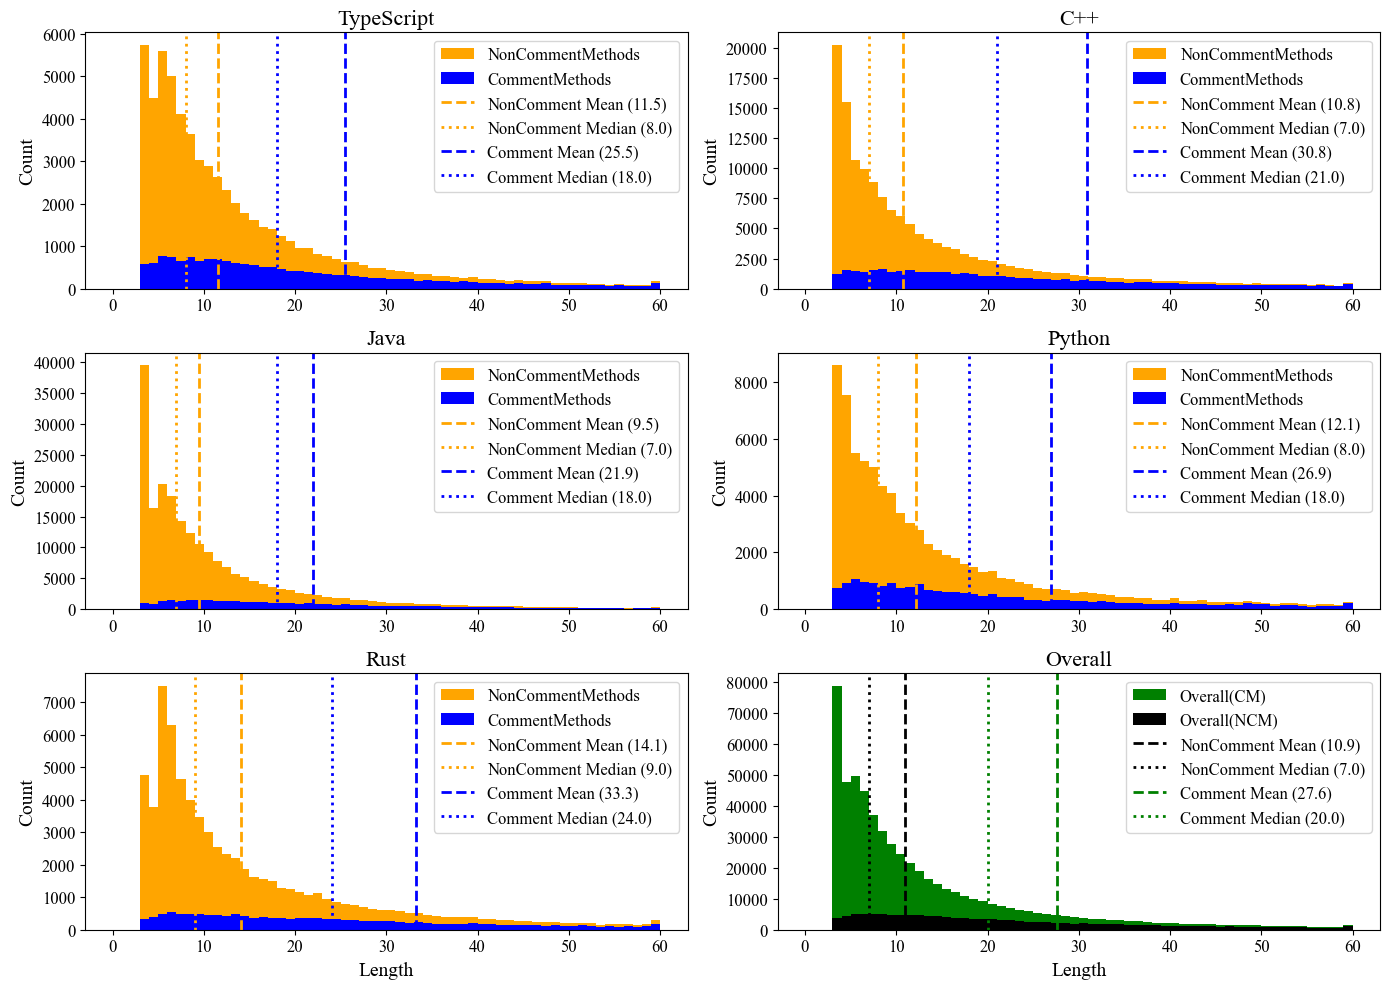

In [ ]:
LANG_TO_LABEL = {
    "py": "Python",
    "rs": "Rust",
    "ts": "TypeScript",
    "java": "Java",
    "cpp": "C++"
}


def plot_len_histogram():
    plt.figure(figsize=(14, 10))
    langs = ['ts', 'cpp', 'java', 'py', 'rs']
    bins = np.arange(0, 61, 1)
    attr = "has_comment"
    for i, lang in enumerate(langs):
        plt.subplot(3, 2, i + 1)
        non_comment_only = df[(df['lang'] == lang)
                              & (df["has_comment"] == False)]['len']
        # plot it so it stacks on too of the comment methods
        non_comment = df[df['lang'] == lang]['len']
        comment = df[(df['lang'] == lang) & (df[attr] == True)]['len']
        should_label = True
        plt.hist(
            non_comment,
            bins=bins,
            #  alpha=0.7,
            color="orange",
            density=False,
            label="NonCommentMethods" if should_label else None)
        plt.hist(
            comment,
            bins=bins,
            #  alpha=0.7,
            color="blue",
            density=False,
            label="CommentMethods" if should_label else None)
        # Calculate mean and median for each group
        for data, color, label in [(non_comment_only, 'orange', 'NonComment'),
                                   (comment, 'blue', 'Comment')]:
            # if len(data) > 0:
            mean = data.mean()
            median = data.median()
            plt.axvline(
                mean,
                color=color,
                linestyle='--',
                linewidth=2,
                label=f'{label} Mean ({mean:0.1f})' if should_label else None)
            plt.axvline(median,
                        color=color,
                        linestyle=':',
                        linewidth=2,
                        label=f'{label} Median ({median:0.1f})'
                        if should_label else None)
        if i > 3:
            plt.xlabel("Length", fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(LANG_TO_LABEL[lang], fontsize=16)
        plt.legend(fontsize=12)
        plt.tight_layout()
    plt.subplot(3, 2, 6)
    comment = df[df[attr]]['len']
    non_comment_only = df[df["has_comment"] == False]['len']
    non_comment = df["len"]
    plt.hist(
        non_comment,
        bins=bins,
        #  alpha=0.7,
        color='green',
        density=False,
        label="Overall(CM)")
    plt.hist(
        comment,
        bins=bins,
        #  alpha=0.7,
        color='black',
        density=False,
        label="Overall(NCM)")
    for data, color, label in [(non_comment_only, 'black', 'NonComment'),
                               (comment, 'green', 'Comment')]:
        # if len(data) > 0:
        mean = data.mean()
        median = data.median()
        plt.axvline(mean,
                    color=color,
                    linestyle='--',
                    linewidth=2,
                    label=f'{label} Mean ({mean:0.1f})')
        plt.axvline(median,
                    color=color,
                    linestyle=':',
                    linewidth=2,
                    label=f'{label} Median ({median:0.1f})')
    plt.legend(fontsize=12)
    plt.xlabel("Length", fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.title('Overall', fontsize=16)
    plt.tight_layout()
    path = os.path.join(FIGS_PATH, "length_histogram.pdf")
    plt.savefig(path)
    path = os.path.join(FIGS_PATH, "length_histogram.png")
    plt.savefig(path)
    plt.show()


plot_len_histogram()